# Korelasyon Analizi

### Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

### İki değişken arasındaki varlığını ve gücünü ölçmek için kullanılan bir yöntemdir. Bu yöntem, değişkenler arasındaki ilişkinin doğasını anlamak, gelecekteki davranışları tahmin etmek veya bir değişkenin diğerine olan etkisini belirlemek için kullanılabilir.

### Korelasyon analizi, Pearson korelasyon katsayısı (r) veya Spearman sıralı korelasyon katsayısı gibi istatistiksel ölçütler kullanılarak gerçekleştirilebilir. Pearson korelasyon katsayısı, iki sürekli değişken arasındaki doğrusal ilişkiyi ölçerken, Spearman korelasyon katsayısı, iki değişken arasındaki ilişkiyi sıralama düzeyinde ölçer.

### Korelasyon analizi, istatistiksel verilerin analizinde yaygın olarak kullanılan bir tekniktir ve birçok alanda uygulanabilir, örneğin ekonomi, psikoloji, sosyoloji ve diğer bilim dallarında.

# Hipotezler:

### H0: p = 0
### H1: p ≠ 0

# Varsayımlar

### İki değişken içinde normallik varsayımı.
### Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
### Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

# İş Uygulaması: Bahşiş İle Hesap Arasındaki İlişkinin İncelenmesi

### Bahşiş ile ödenen hesap arasında korelasyon var mı ?

### H0: p = 0
### H1: p ≠ 0

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Toplam hesap değişkenine bahşiş ve vergiler de dahil. Bu yüzden toplam hesap değişkenini arındırmak için toplam hesaptan bahşiş ve vergiler kısmını çıkartıp daha sonra toplam hesap ve bahşiş değişkenleri arasında korelasyon analizi yapmamız gerekir.

In [3]:
df['total_bill'] = df['total_bill'] - df['tip']

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


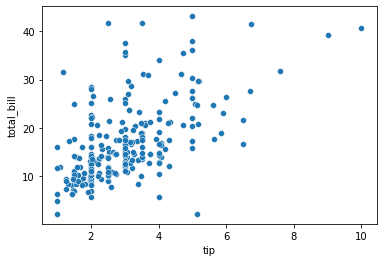

In [6]:
sns.scatterplot(data=df, x='tip', y='total_bill');

### Toplam hesap arttıkça tip 'de artmış gibi gözüküyor.

# Normallik Varsayım Kontrolü

In [7]:
from scipy.stats import shapiro

In [9]:
test_statistic, p_value = shapiro(df['tip'])
print('Test İstatistiği: %.4f, P-Value: %.4f' % (test_statistic, p_value))

test_statistic, p_value = shapiro(df['total_bill'])
print('Test İstatistiği: %.4f, P-Value: %.4f' % (test_statistic, p_value))

Test İstatistiği: 0.8978, P-Value: 0.0000
Test İstatistiği: 0.9136, P-Value: 0.0000


### H0 reddedildi.

# Hipotez Testi

## Korelasyon Katsayısı

In [11]:
df['tip'].corr(df['total_bill'])

0.5766634471096374

In [12]:
df['tip'].corr(df['total_bill'], method = 'spearman')

0.593691939408997

## Korelasyonun Anlamlılığının Testi

In [17]:
from scipy.stats.stats import pearsonr
from scipy.stats import stats

In [22]:
test_statistic, p_value = pearsonr(df['tip'], df['total_bill'])
print('Korelasyon Katsayısı: %.4f, P-Value: %.4f' % (test_statistic, p_value))

Korelasyon Katsayısı: 0.5767, P-Value: 0.0000


### H0 hipotezi reddedildi.

# Nonparametrik Hipotez Testi

In [23]:
test_statistic, p_value = stats.spearmanr(df['tip'], df['total_bill'])
print('Korelasyon Katsayısı: %.4f, P-Value: %.4f' % (test_statistic, p_value))

Korelasyon Katsayısı: 0.5937, P-Value: 0.0000


In [24]:
test_statistic, p_value = stats.kendalltau(df['tip'], df['total_bill'])
print('Korelasyon Katsayısı: %.4f, P-Value: %.4f' % (test_statistic, p_value))

Korelasyon Katsayısı: 0.4401, P-Value: 0.0000
